### INTRODUCTION

We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not. We will use logistic regression (classification) algorithm.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('Data/labels.csv')

In [3]:
df2=pd.read_csv('Data/values.csv')

In [4]:
df =pd.merge(df2,df1)

In [5]:
df.head(5)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [6]:
df.tail(5)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [7]:
df.shape

(180, 15)

In [8]:
print(str(len(df.index)))

180


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
slope_of_peak_exercise_st_segment,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
chest_pain_type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
num_major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
resting_ekg_results,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0
age,180.0,54.811111,9.334737,29.0,48.00,55.0,62.00,77.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [11]:
df.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

### Data Exploration

In [12]:
df.exercise_induced_angina.value_counts()

0    123
1     57
Name: exercise_induced_angina, dtype: int64

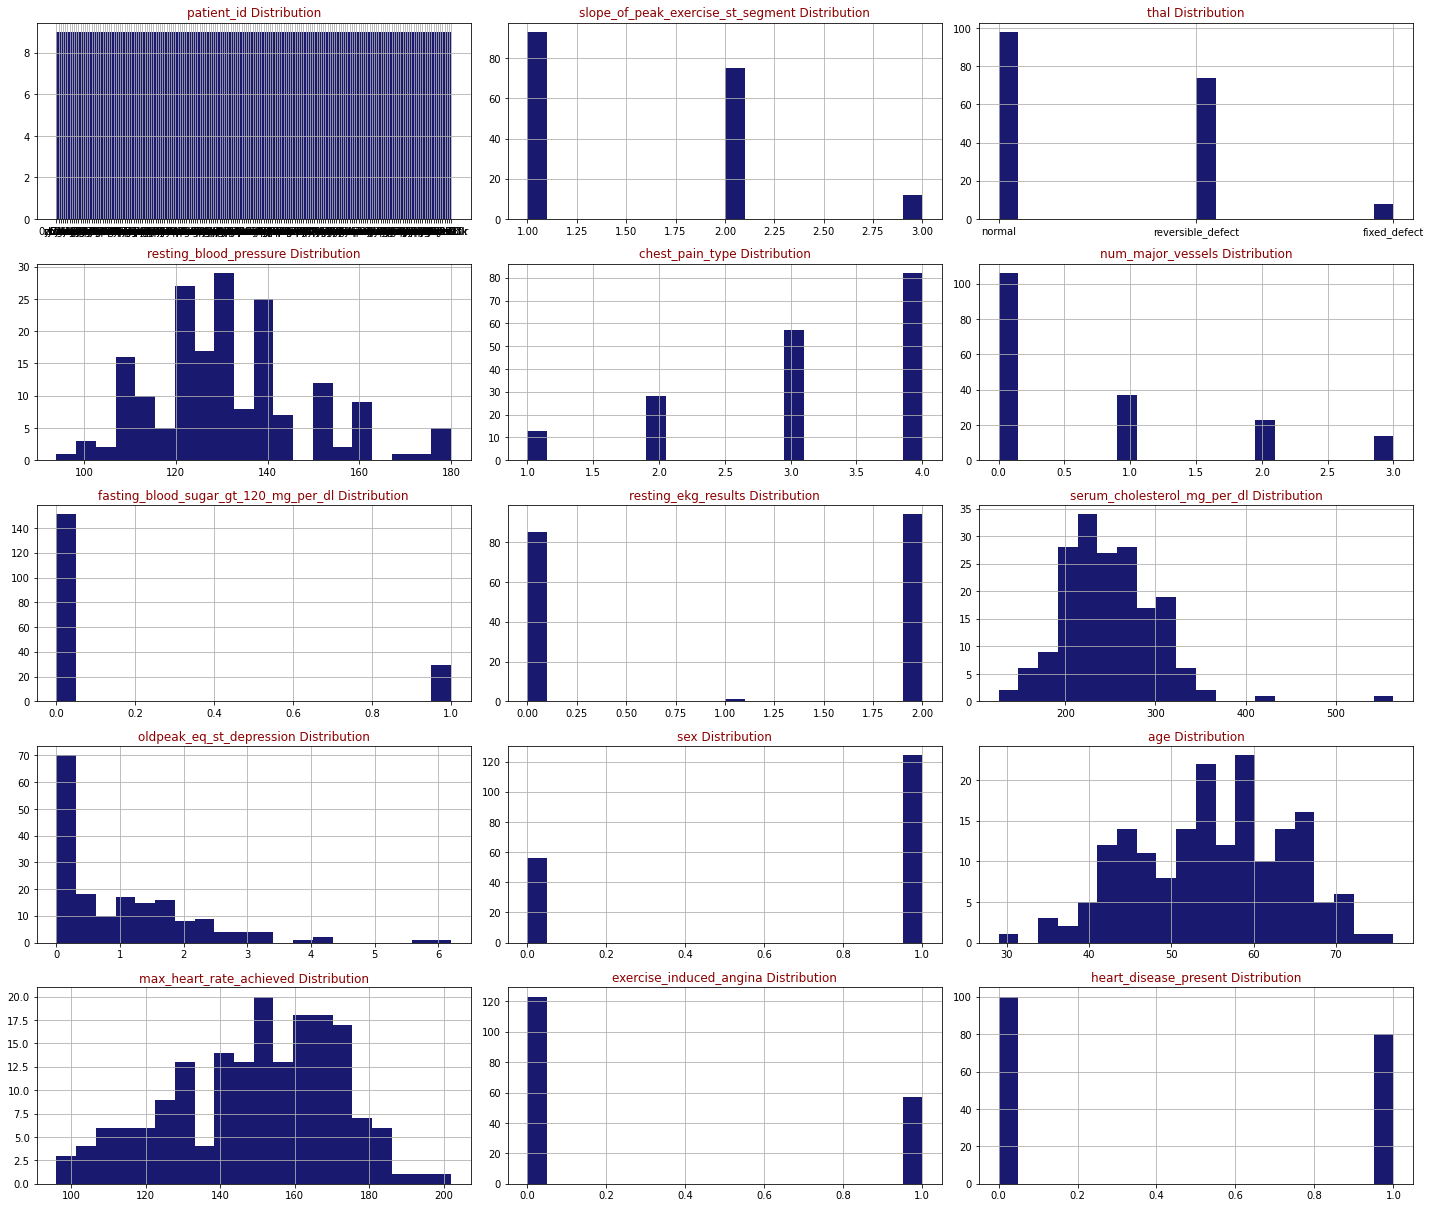

In [13]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

<AxesSubplot:xlabel='exercise_induced_angina', ylabel='count'>

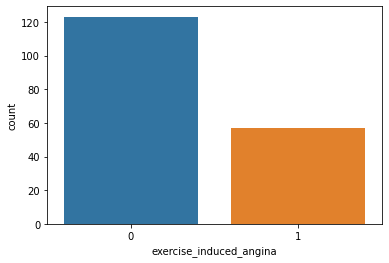

In [14]:
sns.countplot(x="exercise_induced_angina", data=df, )

In [15]:
countNoDisease = len(df[df.exercise_induced_angina == 0])
countHaveDisease = len(df[df.exercise_induced_angina == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.exercise_induced_angina))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.exercise_induced_angina))*100)))

Percentage of Patients Haven't Heart Disease: 68.33%
Percentage of Patients Have Heart Disease: 31.67%


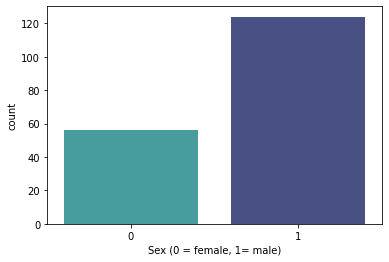

In [16]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [17]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.11%
Percentage of Male Patients: 68.89%


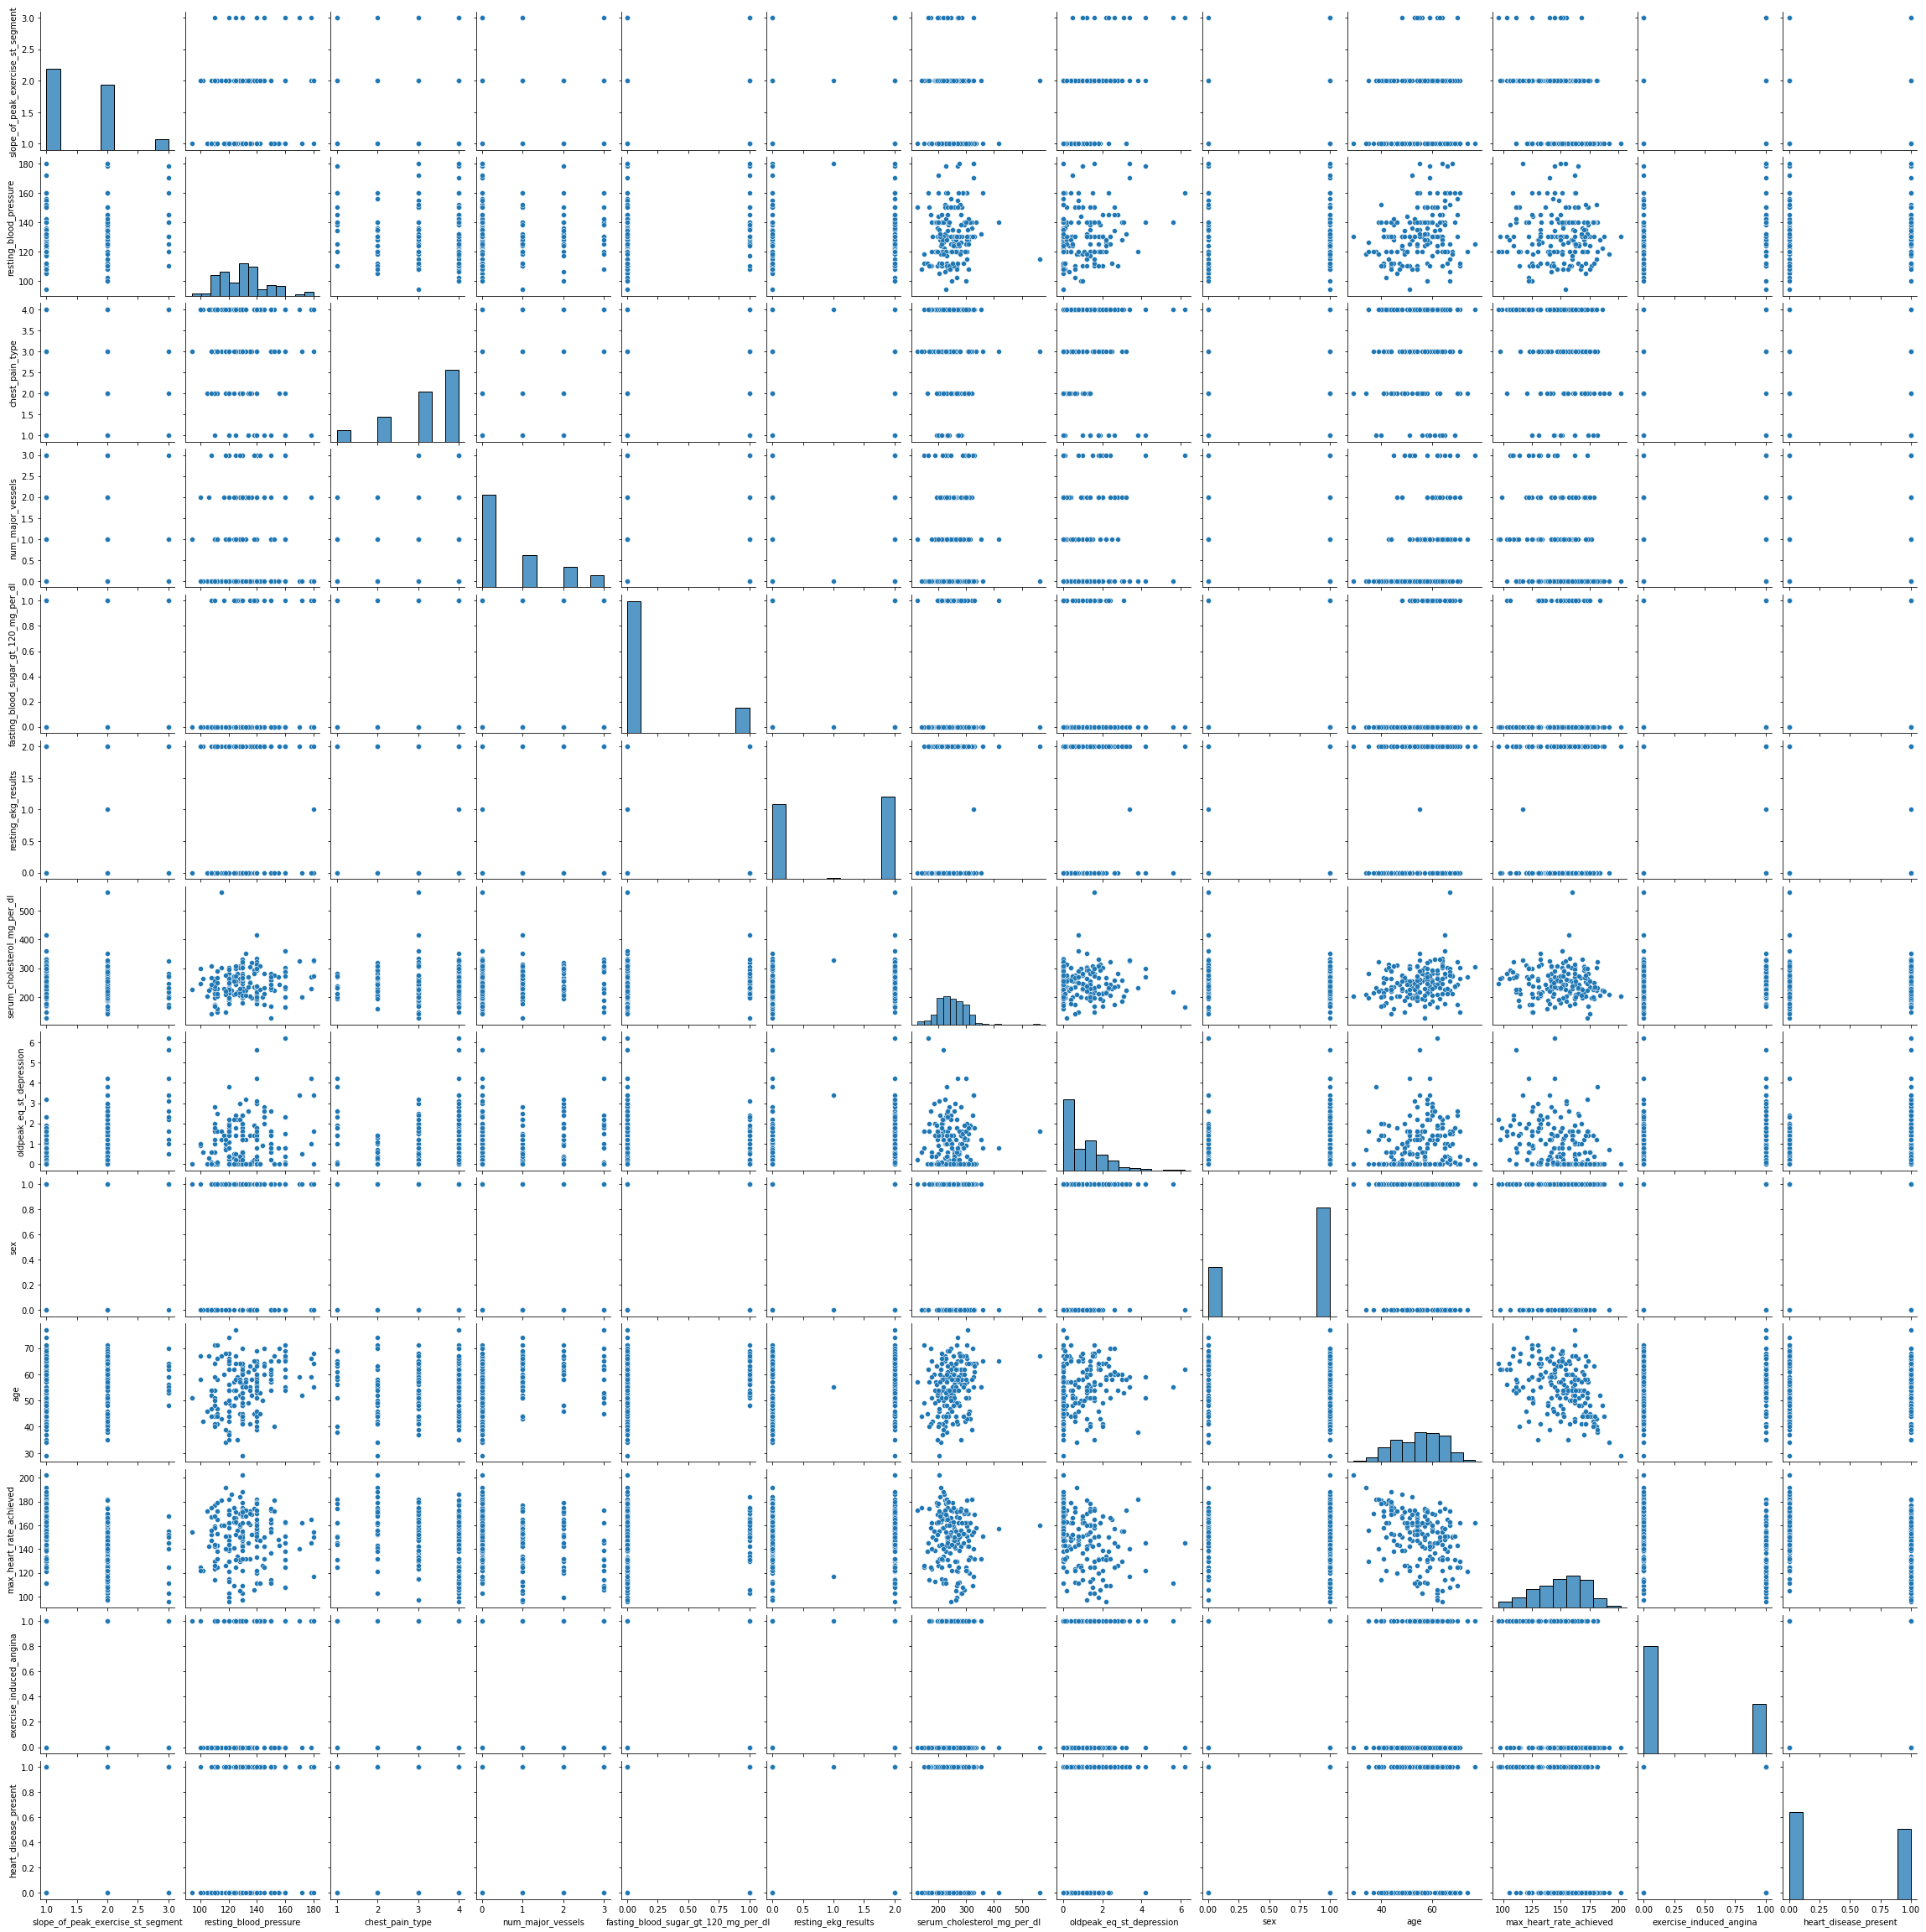

In [18]:
sns.pairplot(df)

In [19]:
df.groupby('exercise_induced_angina').mean()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,heart_disease_present
exercise_induced_angina,,,,,,,,,,,,
0,1.455285,129.886179,2.934959,0.593496,0.162602,1.024390,246.235772,0.820325,0.609756,54.292683,154.951220,0.292683
1,1.754386,134.385965,3.631579,0.912281,0.157895,1.105263,255.631579,1.419298,0.859649,55.929825,137.684211,0.771930


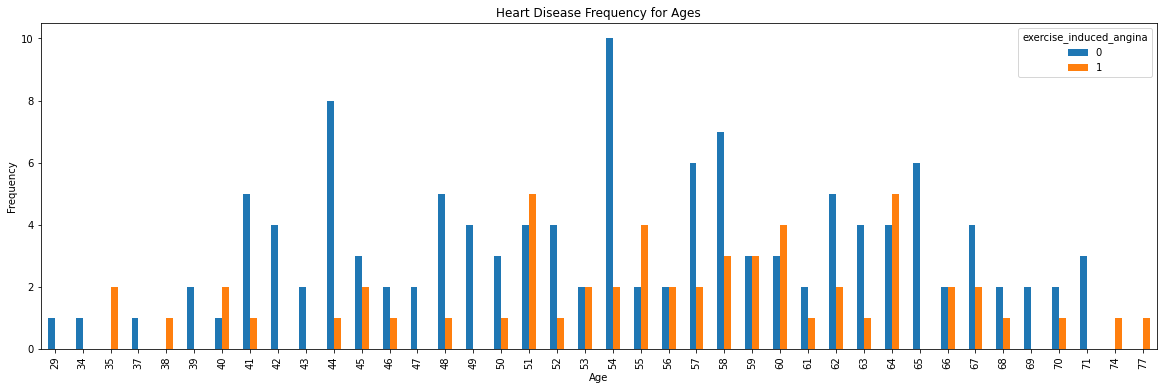

In [20]:
pd.crosstab(df.age,df.exercise_induced_angina).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

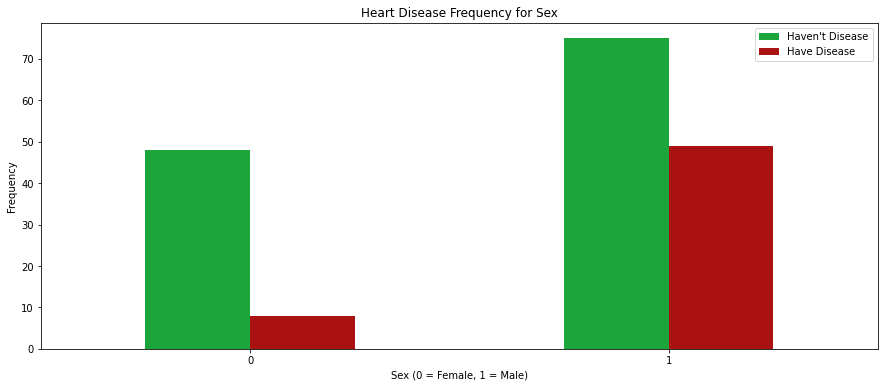

In [21]:
pd.crosstab(df.sex,df.exercise_induced_angina).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

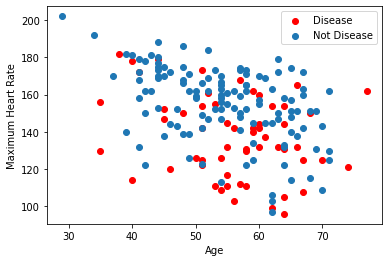

In [22]:
plt.scatter(x=df.age[df.exercise_induced_angina==1], y=df.max_heart_rate_achieved[(df.exercise_induced_angina==1)], c="red")
plt.scatter(x=df.age[df.exercise_induced_angina==0], y=df.max_heart_rate_achieved[(df.exercise_induced_angina==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()


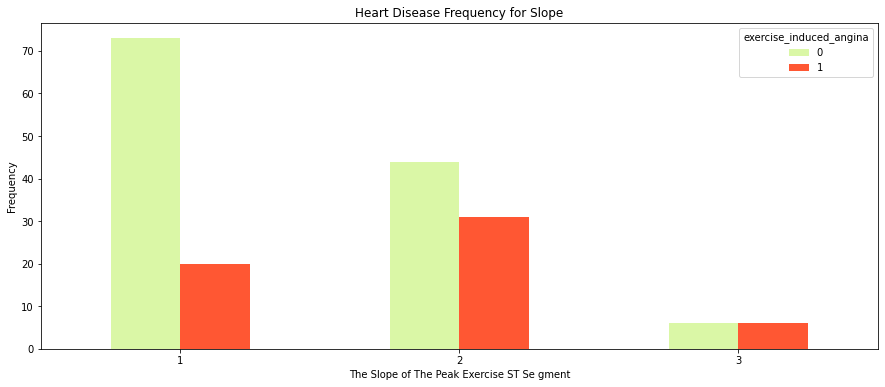

In [23]:
pd.crosstab(df.slope_of_peak_exercise_st_segment,df.exercise_induced_angina).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Se gment')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

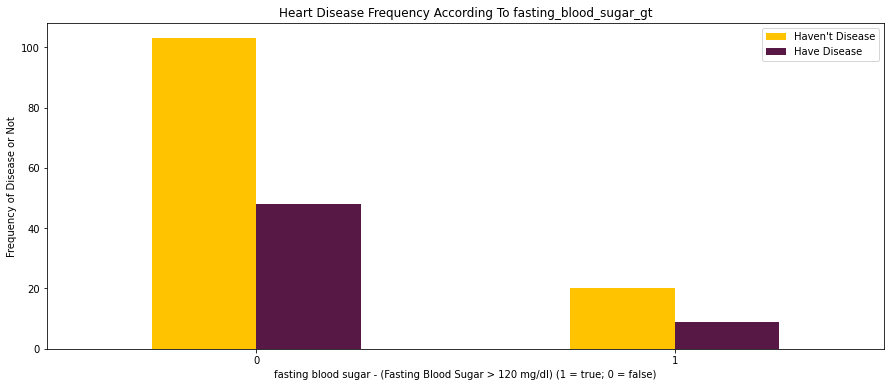

In [24]:
pd.crosstab(df.fasting_blood_sugar_gt_120_mg_per_dl,df.exercise_induced_angina).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To fasting_blood_sugar_gt')
plt.xlabel('fasting blood sugar - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

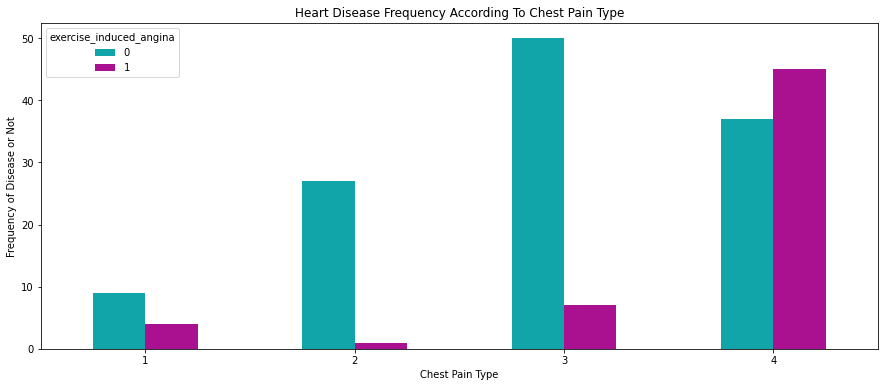

In [25]:
pd.crosstab(df.chest_pain_type,df.exercise_induced_angina).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

## Compare Resting Blood Preasure As Per Sex Column

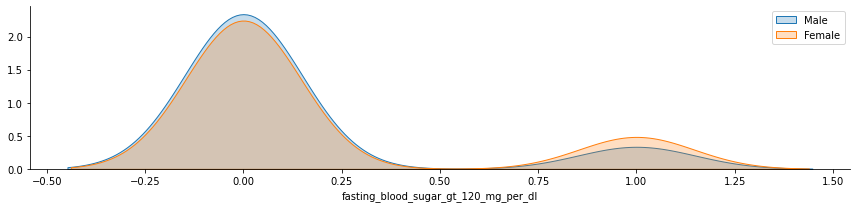

In [26]:
#facetgrid() is useful when u want to visualize the distribution of 2 variables or multivariables separately
g = sns.FacetGrid(df,hue="sex",aspect=4)
g.map(sns.kdeplot, 'fasting_blood_sugar_gt_120_mg_per_dl', shade=True)
plt.legend(labels=['Male', 'Female'])

## Heat Map

<AxesSubplot:>

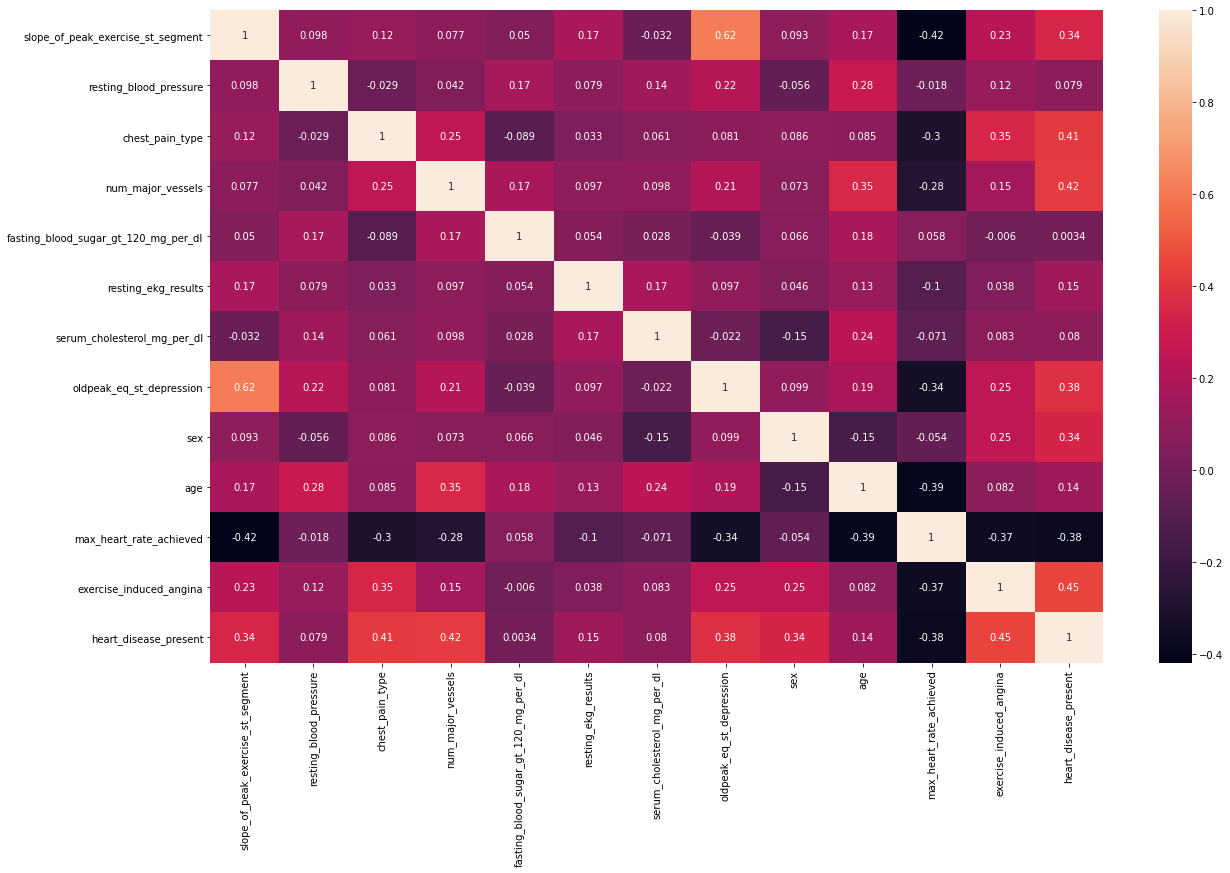

In [27]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)

In [28]:
a = pd.get_dummies(df['chest_pain_type'], prefix = "chest_pain_type")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope_of_peak_exercise_st_segment'], prefix = "slope_of_peak_exercise_st_segment")

In [29]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,...,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,thal_fixed_defect,thal_normal,thal_reversible_defect,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3
0,0z64un,1,normal,128,2,0,0,2,308,0.0,...,0,1,0,0,0,1,0,1,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,...,0,0,1,0,0,1,0,0,1,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,...,0,0,0,1,0,1,0,1,0,0
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,...,0,0,0,1,0,0,1,1,0,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,...,1,0,0,0,0,0,1,0,0,1


In [30]:
df = df.drop(columns = ['chest_pain_type', 'thal', 'slope_of_peak_exercise_st_segment'])
df.head()

,patient_id,resting_blood_pressure,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,...,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,thal_fixed_defect,thal_normal,thal_reversible_defect,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3
0,0z64un,128,0,0,2,308,0.0,1,45,170,...,0,1,0,0,0,1,0,1,0,0
1,ryoo3j,110,0,0,0,214,1.6,0,54,158,...,0,0,1,0,0,1,0,0,1,0
2,yt1s1x,125,3,0,2,304,0.0,1,77,162,...,0,0,0,1,0,1,0,1,0,0
3,l2xjde,152,0,0,0,223,0.0,1,40,181,...,0,0,0,1,0,0,1,1,0,0
4,oyt4ek,178,0,0,2,270,4.2,1,59,145,...,1,0,0,0,0,0,1,0,0,1


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
num_major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
resting_ekg_results,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0
age,180.0,54.811111,9.334737,29.0,48.00,55.0,62.00,77.0
max_heart_rate_achieved,180.0,149.483333,22.063513,96.0,132.00,152.0,166.25,202.0
exercise_induced_angina,180.0,0.316667,0.466474,0.0,0.00,0.0,1.00,1.0


In [32]:
x = df.drop(["exercise_induced_angina"], axis = 1)
y = df.exercise_induced_angina.values


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
df.head()

,patient_id,resting_blood_pressure,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,...,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,thal_fixed_defect,thal_normal,thal_reversible_defect,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3
0,0z64un,128,0,0,2,308,0.0,1,45,170,...,0,1,0,0,0,1,0,1,0,0
1,ryoo3j,110,0,0,0,214,1.6,0,54,158,...,0,0,1,0,0,1,0,0,1,0
2,yt1s1x,125,3,0,2,304,0.0,1,77,162,...,0,0,0,1,0,1,0,1,0,0
3,l2xjde,152,0,0,0,223,0.0,1,40,181,...,0,0,0,1,0,0,1,1,0,0
4,oyt4ek,178,0,0,2,270,4.2,1,59,145,...,1,0,0,0,0,0,1,0,0,1
